<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/RL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup and Environment**

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Fixing seed for reproducibility
np.random.seed(0)

In [3]:
#Loading and rendering the gym environment
env = gym.make("Taxi-v3").env
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


**Q-learning** 





initialize our Q-table given the state and action space in STEP 1;
choose the hyperparameters for training;
choose an action: explore or exploit in STEP 2;
perform the action and measure the reward in STEPs 3 & 4;
^^
update the Q-table using the Bellman equation in STEP 5.
update the collected rewards
use decay to balance exploration and exploitation

In [5]:
#STEP 1 - Initializing the Q-table

Q = np.zeros((env.observation_space.n, env.action_space.n))

In [6]:
#Setting the hyperparameters
              
alpha = 0.7 #learning rate                 
discount_factor = 0.618               
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 2000    
test_episodes = 100          
max_steps = 100

In [7]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []

for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    state = env.reset()    
    #Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(100):
        #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1) 
        
        
        ### STEP 2: SECOND option for choosing the initial action - exploit     
        #If the random number is larger than epsilon: employing exploitation 
        #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])      
            
        ### STEP 2: FIRST option for choosing the initial action - explore       
        #Otherwise, employing exploration: choosing a random action 
        else:
            action = env.action_space.sample()
            
            
        ### STEPs 3 & 4: performing the action and getting the reward     
        #Taking the action and getting the reward and outcome state
        new_state, reward, done, info = env.step(action)
        

        ### STEP 5: update the Q-table
        #Updating the Q-table using the Bellman equation
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action]) 
        #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state         
        
        #Ending the episode
        if done == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    
    

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

Training score over time: -19.4645


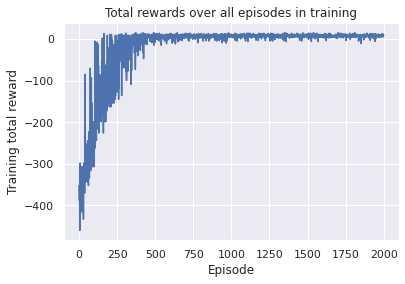

In [8]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

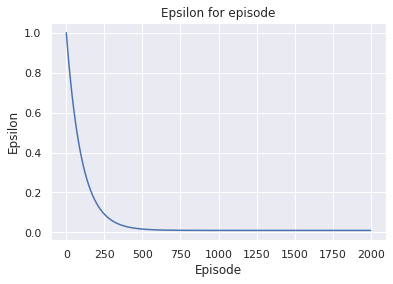

In [9]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()